1. We have 2 recommender systems: Model A & Model B. This is a summary table\
of daily performance of the 2 models from 2020-09-07 to 2020-09-13. The manager\
has assigned each model different amounts of customers to test their\
performance each day ( Customer_Count is the amount of customers assigned by the\
manager ). After a seven-day test, which model will you choose, Model A or Model\
B? Please explain your decision.

      Hint: Margin = Net_Amount/Sales_Amount
      
      Please refer to the following for this question.
      
      Date By Margin (%) Customer_Count Sales_Amount Net_Amount\
      2020-09-07 Model A 2.81% 74 2448 68.8\
      2020-09-08 Model A 1.11% 92 3232 35.72\
      2020-09-09 Model A 1.86% 120 3948 73.29\
      2020-09-10 Model A 2.20% 63 2207 48.45\
      2020-09-11 Model A 1.61% 64 2155 34.68\
      2020-09-12 Model A 0.64% 265 8484 54.29\
      2020-09-13 Model A 0.28% 241 7857 22.37\
      2020-09-07 Model B 3.31% 29 863 28.54\
      2020-09-08 Model B 1.36% 25 800 10.88\
      2020-09-09 Model B 1.27% 29 986 12.56\
      2020-09-10 Model B 1.14% 19 593 6.79\
      2020-09-11 Model B 2.23% 22 739 16.44\
      2020-09-12 Model B 0.55% 42 1348 7.37\
      2020-09-13 Model B 0.13% 53 1768 2.3

首先，我會選擇Net_per_Customer=Net_Amount/Customer_Count作為模型表現的評估指標，\
因為該指標能夠最如實反映，在相同的客戶群體下，兩個模型誰能夠創造更大的收益。

In [11]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = [
    {"Date": "2020-09-07", "Model": "A", "Customer_Count": 74, "Net_Amount": 68.8},
    {"Date": "2020-09-08", "Model": "A", "Customer_Count": 92, "Net_Amount": 35.72},
    {"Date": "2020-09-09", "Model": "A", "Customer_Count": 120, "Net_Amount": 73.29},
    {"Date": "2020-09-10", "Model": "A", "Customer_Count": 63, "Net_Amount": 48.45},
    {"Date": "2020-09-11", "Model": "A", "Customer_Count": 64, "Net_Amount": 34.68},
    {"Date": "2020-09-12", "Model": "A", "Customer_Count": 265, "Net_Amount": 54.29},
    {"Date": "2020-09-13", "Model": "A", "Customer_Count": 241, "Net_Amount": 22.37},
    {"Date": "2020-09-07", "Model": "B", "Customer_Count": 29, "Net_Amount": 28.54},
    {"Date": "2020-09-08", "Model": "B", "Customer_Count": 25, "Net_Amount": 10.88},
    {"Date": "2020-09-09", "Model": "B", "Customer_Count": 29, "Net_Amount": 12.56},
    {"Date": "2020-09-10", "Model": "B", "Customer_Count": 19, "Net_Amount": 6.79},
    {"Date": "2020-09-11", "Model": "B", "Customer_Count": 22, "Net_Amount": 16.44},
    {"Date": "2020-09-12", "Model": "B", "Customer_Count": 42, "Net_Amount": 7.37},
    {"Date": "2020-09-13", "Model": "B", "Customer_Count": 53, "Net_Amount": 2.3},
]

df = pd.DataFrame(data)
df["Net_per_Customer"] = df["Net_Amount"] / df["Customer_Count"]
df

,Date,Model,Customer_Count,Net_Amount,Net_per_Customer
0,2020-09-07,A,74,68.80,0.929730
1,2020-09-08,A,92,35.72,0.388261
2,2020-09-09,A,120,73.29,0.610750
3,2020-09-10,A,63,48.45,0.769048
4,2020-09-11,A,64,34.68,0.541875
5,2020-09-12,A,265,54.29,0.204868
6,2020-09-13,A,241,22.37,0.092822
7,2020-09-07,B,29,28.54,0.984138
8,2020-09-08,B,25,10.88,0.435200
9,2020-09-09,B,29,12.56,0.433103


在模型選擇的部分，我會選擇 Model A，因為如果透過分別計算Model A與Model B\
的每日Net_per_Customer再取整週平均，Model A 的平均為 0.505336，高於 Model B 的 0.453708，\
雖然直接計算整體的Net_per_Customer，Model A的結果0.367356會低於 Model B 的 0.387580。

In [15]:
# 每天的 Net_per_Customer 平均（分 model）
daily_avg = df.groupby(["Date", "Model"])["Net_per_Customer"].mean().reset_index()

# 分別計算 Model A 與 Model B 的每日平均再取整週平均
model_avg_by_day = daily_avg.groupby("Model")["Net_per_Customer"].mean()
print("每天平均後取平均：")
print(model_avg_by_day.reset_index())

# 加總後計算 Net_per_Customer
model_total = df.groupby("Model")[["Net_Amount", "Customer_Count"]].sum()
model_total["Net_per_Customer"] = model_total["Net_Amount"] / model_total["Customer_Count"]
print("\n直接加總後計算 Net_per_Customer：")
print(model_total[["Net_per_Customer"]].reset_index())

每天平均後取平均：
  Model  Net_per_Customer
0     A          0.505336
1     B          0.453708

直接加總後計算 Net_per_Customer：
  Model  Net_per_Customer
0     A          0.367356
1     B          0.387580


但該原因是因為Manager對於兩個Model在七天的客戶百分比分配不均所造成，\
Date對於Net_per_Customer的影響顯著，從Two-way ANOVA的結果即可看出，\
而其中買氣不佳的日期2020-09-12跟2020-09-13，Model A在這兩天被分配的顧客\
占其比例55.05%，Model B只被分配了其總體顧客的43.38%，在買氣最旺的日期2020-09-07，\
Model A在這兩天被分配的顧客占其比例8.05%，Model B分配了其總體顧客的13.24%。

In [ ]:
# Two-way ANOVA: Model + Date + Interaction
model = ols('Net_per_Customer ~ C(Model) + C(Date)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

            sum_sq   df         F    PR(>F)
C(Model)  0.009329  1.0  0.480393  0.514164
C(Date)   1.043091  6.0  8.952102  0.008677
Residual  0.116519  6.0       NaN       NaN
            sum_sq   df         F    PR(>F)
C(Model)  0.009329  1.0  0.480393  0.514164
C(Date)   1.043091  6.0  8.952102  0.008677
Residual  0.116519  6.0       NaN       NaN


綜上所述，第一題的結論我選擇Model A。

2. We are running a business that sells houses. We have a very high customer
cost. Based on the 10 user data in our system, should we get this new customer
with the following information below?

      Please refer to the following for this question.

      New customer:\
      Age Gender Annual income Married\
      40 Female 310k FALSE

      User Age Gender Annual income Married Buy\
      1 27 Male 150k FALSE FALSE\
      2 47 Female 300k TRUE TRUE\
      3 32 Male 120k FALSE FALSE\
      4 24 Male 450k FALSE TRUE\
      5 45 Male 300k TRUE FALSE\
      6 56 Male 320k TRUE TRUE\
      7 31 Male 150k FALSE FALSE\
      8 23 Female 300k TRUE FALSE\
      9 42 Male 230k FALSE FALSE\
      10 32 Female 420k TRUE TRUE

第一步先將類別變數進行ont-hot encoding，並觀察各項變數與是否夠買的相關性，接著做Pearson correlation test，從下方結果顯示，Income對於是否購買的線性相關是顯著的，接著查看income的分布。

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 建立資料
data = [
    {"Age": 27, "Gender": "Male", "Income": 150, "Married": False, "Buy": False},
    {"Age": 47, "Gender": "Female", "Income": 300, "Married": True, "Buy": True},
    {"Age": 32, "Gender": "Male", "Income": 120, "Married": False, "Buy": False},
    {"Age": 24, "Gender": "Male", "Income": 450, "Married": False, "Buy": True},
    {"Age": 45, "Gender": "Male", "Income": 300, "Married": True, "Buy": False},
    {"Age": 56, "Gender": "Male", "Income": 320, "Married": True, "Buy": True},
    {"Age": 31, "Gender": "Male", "Income": 150, "Married": False, "Buy": False},
    {"Age": 23, "Gender": "Female", "Income": 300, "Married": True, "Buy": False},
    {"Age": 42, "Gender": "Male", "Income": 230, "Married": False, "Buy": False},
    {"Age": 32, "Gender": "Female", "Income": 420, "Married": True, "Buy": True},
]

# 建立 DataFrame
df = pd.DataFrame(data)

# 類別轉數值
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Married"] = df["Married"].astype(int)
df["Buy"] = df["Buy"].astype(int)

results = []
for col in ["Age", "Gender", "Income", "Married"]:
    corr, p = pearsonr(df[col], df["Buy"])
    results.append({"Variable": col, "Correlation": corr, "p-value": p})

# 顯示結果
result_df = pd.DataFrame(results).sort_values(by="p-value")
print(result_df)

  Variable  Correlation   p-value
2   Income     0.757110  0.011222
3  Married     0.408248  0.241504
1   Gender     0.356348  0.312160
0      Age     0.301246  0.397640


從分布結果可以看出，income>300的顧客全部會購買，新顧客的收入為310，因此我們該招攬新客戶。

/tmp/ipykernel_65575/2471047078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Buy", y="Income", data=df, palette=["skyblue", "salmon"])


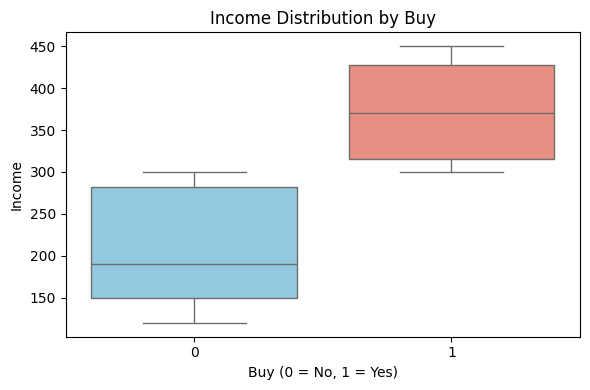

In [2]:
# 使用無 hue 的版本避免 seaborn bug
plt.figure(figsize=(6, 4))
sns.boxplot(x="Buy", y="Income", data=df, palette=["skyblue", "salmon"])
plt.title("Income Distribution by Buy")
plt.xlabel("Buy (0 = No, 1 = Yes)")
plt.ylabel("Income")
plt.tight_layout()
plt.show()


/tmp/ipykernel_65575/617844069.py:12: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


Predicted sales on day 500: 0.011894 million
Predicted sales on day 1000: 0.000132 million


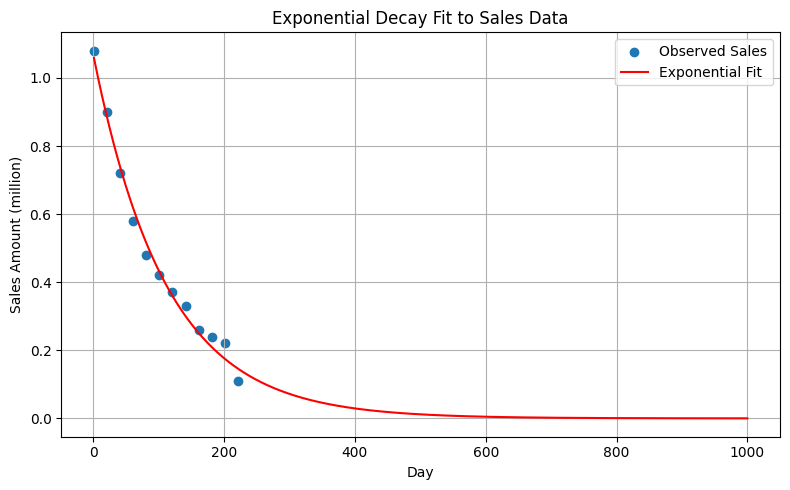

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     262.1
Date:                Thu, 15 May 2025   Prob (F-statistic):           1.67e-08
Time:                        10:49:12   Log-Likelihood:                 8.4497
No. Observations:                  12   AIC:                            -12.90
Df Residuals:                      10   BIC:                            -11.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0599      0.072      0.836      0.4

/home/jonaskao/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import statsmodels.api as sm

# 原始資料
days = np.array([1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 221])
sales = np.array([1.08, 0.90, 0.72, 0.58, 0.48, 0.42, 0.37, 0.33, 0.26, 0.24, 0.22, 0.11])

# 定義指數衰減模型
def exp_decay(x, a, b):
    return a * np.exp(-b * x)

# 擬合模型
params, covariance = curve_fit(exp_decay, days, sales)
a, b = params

# 預測第 500 與 1000 天
day_500 = exp_decay(500, a, b)
day_1000 = exp_decay(1000, a, b)

print(f"Predicted sales on day 500: {day_500:.6f} million")
print(f"Predicted sales on day 1000: {day_1000:.6f} million")

# 畫擬合圖
x_fit = np.linspace(1, 1000, 500)
y_fit = exp_decay(x_fit, a, b)

plt.figure(figsize=(8, 5))
plt.scatter(days, sales, label="Observed Sales")
plt.plot(x_fit, y_fit, color="red", label="Exponential Fit")
plt.xlabel("Day")
plt.ylabel("Sales Amount (million)")
plt.title("Exponential Decay Fit to Sales Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 顯著性檢定：轉換為 ln(y) = ln(a) - b * x
log_sales = np.log(sales)
X = sm.add_constant(days)
model = sm.OLS(log_sales, X).fit()
print(model.summary())
